In [2]:
# Import Pandas and Numpy libraries 
import pandas as pd
import numpy as np
# Data Vidualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Training and Test Data 
from sklearn.model_selection import train_test_split
# Cross-Validation
from sklearn.cross_validation import KFold
# Machine Learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.naive_bayes import GaussianNB as GB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
# Evaluation matrics
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

# Preprocessing the Data
from sklearn.preprocessing import StandardScaler

# Handling Imbalanced Data
# https://www.kaggle.com/zurfer/setting-the-baseline-auc-0-70

In [3]:
# Loading Data
df= pd.read_csv("C:/Users/chunweil/undersample_DCwater.csv")
# Select the features for analyzing (including target)
Important_feature=['BinomBreak','FrzIndex','DIAMTR','AGE15','FrostAct','Pop','Road','MATRL_CI','LANDUSE_Transport']
# Create the dataset for modeling 
dc_water=df.loc[:,Important_feature]
dc_water.head(6)

,BinomBreak,FrzIndex,DIAMTR,AGE15,FrostAct,Pop,Road,MATRL_CI,LANDUSE_Transport
0,1,73,16.0,63,1,1073,0,1,1
1,1,73,16.0,89,2,111,3,1,1
2,1,73,30.0,75,3,918,3,0,1
3,1,91,16.0,89,2,34,3,1,1
4,1,91,36.0,100,1,2052,3,1,1
5,1,91,36.0,73,3,62,3,0,1


In [4]:
# Check the statistic of original dataset
test_ML=dc_water
print(test_ML.describe())


        BinomBreak     FrzIndex       DIAMTR        AGE15     FrostAct  \
count  1212.000000  1212.000000  1212.000000  1212.000000  1212.000000   
mean      0.500000    67.317657    25.694307    73.160066     1.279703   
std       0.500206    13.559019    10.900874    33.331790     1.240715   
min       0.000000    30.000000    16.000000     0.000000     0.000000   
25%       0.000000    58.000000    16.000000    59.000000     0.000000   
50%       0.500000    69.000000    20.000000    71.000000     2.000000   
75%       1.000000    77.000000    30.000000    90.000000     2.000000   
max       1.000000    91.000000    78.000000   155.000000     3.000000   

               Pop         Road     MATRL_CI  LANDUSE_Transport  
count  1212.000000  1212.000000  1212.000000        1212.000000  
mean    286.811881     1.425743     0.680693           0.896040  
std     439.356811     1.481601     0.466401           0.305335  
min       0.000000     0.000000     0.000000           0.000000  
25%

1


count    606.000000
mean      78.051155
std       29.652517
min        0.000000
25%       66.000000
50%       73.000000
75%       91.000000
max      155.000000
Name: AGE15, dtype: float64

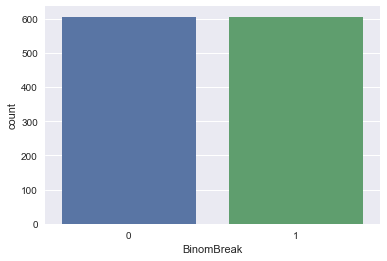

In [5]:
# Count the number of instances in "Non-Break" and " Break" class respectively
from collections import Counter
non_break=Counter(test_ML["BinomBreak"])[0]
break1=Counter(test_ML["BinomBreak"])[1]
print (non_break/break1)

# Countplot
sns.countplot(test_ML["BinomBreak"])

# Check the average of AGE15 by "BinomBreak"
test_ML.AGE15[dc_water.BinomBreak==1].describe()

In [9]:
# Specify the predictors and target
predictors_feature=['FrzIndex','DIAMTR','AGE15','FrostAct','Pop','Road','MATRL_CI','LANDUSE_Transport']
target_feature=["BinomBreak"]




In [15]:
# Create a function for machine learning algorithmns  
# return: precision recall
def Classification_model_precision(model,Data,x,y):
# here x is the variable which are used for prediction(test) and y is the prediction variable 
# test_size and random_state can be changed 
    train,test = train_test_split(df_test,test_size=0.33,random_state=7)
    train_x = Data.ix[train.index,x] # Data for training only with features
    train_y = Data.ix[train.index,y] # Data for training only with predcition variable
    test_x = Data.ix[test.index,x] # same as for training 
    test_y = Data.ix[test.index,y]
    scaler=StandardScaler() # feature scaling 
    scaler.fit(train_x)
    x_train=scaler.transform(train_x)
    x_test=scaler.transform(test_x)

    model.fit(x_train,train_y.values.ravel())
    pred=model.predict(x_test)
    #pred_prob=model.predict_proba(x_test)
    #accuracy=accuracy_score(test_y,pred)
    #CM=confusion_matrix(test_y,pred)
    #roc_score=roc_score(test_y,pred)
    #CR=classification_report(test_y,pred)
    pr=precision_score(test_y,pred)
    rl=recall_score(test_y,pred)
    return pr,rl

In [16]:
# Create a function for machine learning algorithmns  
# return: accuracy
def Classification_model_accuracy(model,Data,x,y):
# here x is the variable which are used for prediction(test) and y is the prediction variable 
    
    train,test = train_test_split(test_ML,test_size=0.33,random_state=7)
    train_x = Data.ix[train.index,x] # Data for training only with features
    train_y = Data.ix[train.index,y] # Data for training only with predcition variable
    test_x = Data.ix[test.index,x] # same as for training 
    test_y = Data.ix[test.index,y]
    scaler=StandardScaler() # feature scaling 
    scaler.fit(train_x)
    x_train=scaler.transform(train_x)
    x_test=scaler.transform(test_x)

    model.fit(x_train,train_y.values.ravel())
    pred=model.predict(x_test)
    
    #pred_prob=model.predict_proba(x_test)
    accuracy=accuracy_score(test_y,pred)
    #CM=confusion_matrix(test_y,pred)
    #roc_score=roc_score(test_y,pred)
    #CR=classification_report(test_y,pred)
    #pr=precision_score(test_y,pred)
    return accuracy

In [18]:
# Create a function for machine learning algorithmns  
# return: Cofusion Matrix
def Classification_model_CM(model,Data,x,y):
# here x is the variable which are used for prediction(test) and y is the prediction variable 
    
    train,test = train_test_split(test_ML,test_size=0.33,random_state=7)
    train_x = Data.ix[train.index,x] # Data for training only with features
    train_y = Data.ix[train.index,y] # Data for training only with predcition variable
    test_x = Data.ix[test.index,x] # same as for training 
    test_y = Data.ix[test.index,y]
    scaler=StandardScaler() # feature scaling 
    scaler.fit(train_x)
    x_train=scaler.transform(train_x)
    x_test=scaler.transform(test_x)

    model.fit(x_train,train_y.values.ravel())
    pred=model.predict(x_test)
    #pred_prob=model.predict_proba(x_test)
    accuracy=accuracy_score(test_y,pred)
    CM=confusion_matrix(test_y,pred)
    #roc_score=roc_score(test_y,pred)
    #CR=classification_report(test_y,pred)
    #pr=precision_score(test_y,pred)
    return CM

def Classification_model_Report(model,Data,x,y):
# here x is the variable which are used for prediction(test) and y is the prediction variable 
    
    train,test = train_test_split(test_ML,test_size=0.33,random_state=7)
    train_x = Data.ix[train.index,x] # Data for training only with features
    train_y = Data.ix[train.index,y] # Data for training only with predcition variable
    test_x = Data.ix[test.index,x] # same as for training 
    test_y = Data.ix[test.index,y]
    scaler=StandardScaler() # feature scaling 
    scaler.fit(train_x)
    x_train=scaler.transform(train_x)
    x_test=scaler.transform(test_x)

    model.fit(x_train,train_y.values.ravel())
    pred=model.predict(x_test)
    #pred_prob=model.predict_proba(x_test)
    #accuracy=accuracy_score(test_y,pred)
    #CM=confusion_matrix(test_y,pred)
    #roc_score=roc_score(test_y,pred)
    CR=classification_report(test_y,pred)
    #pr=precision_score(test_y,pred)
    return CR

In [11]:
# Basic Machine learning Models 
models=["RandomForestClassifier","Gaussian Naive Bays","KNN","Logistic_Regression","Support_Vector"]
# The arguement in the models can be modified, such as 100 n_estimators or number of n_neighbors
Classification_models =[RandomForestClassifier(n_estimators=100),GB(),knn(n_neighbors=5),LogisticRegression(),SVC()]
Pred_var=["BinomBreak"]


In [25]:
# Evaluate performance of original ML models 
Precision=[]
Recall=[]
seed=np.random.seed(1)
for model in Classification_models:
    pr=Classification_model_precision(model,df_test,predictors_feature,target_feature)[0]
    rl=Classification_model_precision(model,df_test,predictors_feature,target_feature)[1]
    Precision.append(pr)
    Recall.append(rl)

In [73]:
# Table for comparison with multiple algorithmns
Precision_with_important_features = pd.DataFrame(
    { "Classification Model" :models,
     "Precision with important features":Precision,
     "Recall with important features":Recall
    })
    
Precision_with_important_features.sort_values(by="Recall with important features",ascending=False).reset_index(drop=True)

,Classification Model,Precision with important features,Recall with important features
0,Gaussian Naive Bays,0.621287,0.753846
1,RandomForestClassifier,0.621287,0.733333
2,KNN,0.621287,0.692308
3,Logistic_Regression,0.621287,0.625641
4,Support_Vector,0.621287,0.610256


In [38]:
# Advanced Machine Learning Models
# Create a function for Parameters Tuning  
from sklearn.model_selection import GridSearchCV
def Classification_model_GridSearch(model,Data,x,y,params):
    data_x = Data.ix[:,x]  
    data_y = Data.ix[:,y] 
    data_y=data_y.values.ravel()
    clf = GridSearchCV(model,params,scoring= 'accuracy',cv=5)
    clf.fit(data_x,data_y)
    print("best score is :")
    print(clf.best_score_)
    print('')
    print("best estimator is :")
    print(clf.best_estimator_)

    return (clf.best_score_)

In [ ]:
# New Machine Learning model
models=["RandomForestClassifier","Gaussian Naive Bays","KNN","Logistic_Regression","Support_Vector"]

In [39]:
# 1. Radome Forest with parameter tuning 
# The parameters can be modified and optimized
# n_estimators: the number of tree in the forest
# criterion: the function to measure the quality of a split
# max_features: the number of features to consider when looking for the best split 
# max_depth: the maximum depth of the tree
seed=np.random.seed(1)
model = RandomForestClassifier(random_state=seed)
Model_Precision=[]
param_grid = {'n_estimators':(70,80,90,100),'criterion':('gini','entropy'),'max_depth':[25,30]}
Precision=Classification_model_GridSearch(model,df_test,predictors_feature,target_feature,param_grid)
Model_Precision.append(Precision)

best score is :
0.621287128713

best estimator is :
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=90, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


In [40]:
# After tunning the parameter in random forest, the precision rate increases 
# Copy and paste the parameter after tuning 
seed=np.random.seed(1)
pr_rm_pt=Classification_model_precision(RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=90, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),df_test,predictors_feature,target_feature)
print (pr_rm_pt)


(0.69377990430622005, 0.74358974358974361)


In [51]:
# Boosting
# Gradiant Boosting Decision Tree
import pandas
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier
seed=np.random.seed(1)
model_Boosing=GradientBoostingClassifier(n_estimators=num_tree,random_state=seed)
pr_bd=Classification_model_precision(model_Boosing,df_test,predictors_feature,target_feature)
print(pr_bd)



(0.65437788018433185, 0.72820512820512817)


In [74]:
# AdaBoosting with Decsion Tree
from sklearn.ensemble import AdaBoostClassifier
seed=np.random.seed(1)
cr_ada= Classification_model_precision(AdaBoostClassifier(n_estimators=100,learning_rate=1),df_test,predictors_feature,target_feature)
print(cr_ada)

(0.69633507853403143, 0.68205128205128207)


In [54]:
#KNN
# parameters includes n_neighbors(number of neighbors to use)
# weights(weight function used in prediction
# p= power parameter for the Minkowski metic
seed=np.random.seed(1)
param_grid={'n_neighbors':[5,15],'weights':('uniform','distance'),'p':[1,5]}
PR_KNN=Classification_model_GridSearch(knn(),df_test,predictors_feature,target_feature,param_grid)
print (PR_KNN)

best score is :
0.631188118812

best estimator is :
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=1,
           weights='distance')
0.631188118812


In [64]:
#KNN with parameter tuning
seed=np.random.seed(1)
pr_knn_tu=Classification_model_precision(knn(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=1,
           weights='distance'),df_test,predictors_feature,target_feature)

print (pr_knn_tu)



(0.65086206896551724, 0.77435897435897438)


In [65]:
# Finalize the advanced machine learning models
seed=np.random.seed(1)
new_model=["Random Forest with Tuning",
           "Gradient Boosting Decsion Tree",
           "AdaBoosting",
           "KNN with Tuning"
          ]
Classification_models =[RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=90, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
                        GradientBoostingClassifier(n_estimators=num_tree,random_state=seed),
                        AdaBoostClassifier(n_estimators=100, base_estimator=dt,learning_rate=1),
                        knn(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=1,
           weights='distance')]

In [66]:
# Evaluate performance of New ML models 
Precision_new=[]
Recall_new=[]
for model in Classification_models:
    pr=Classification_model_precision(model,df_test,predictors_feature,target_feature)[0]
    rl=Classification_model_precision(model,df_test,predictors_feature,target_feature)[1]
    Precision_new.append(pr)
    Recall_new.append(rl)

In [67]:
# Create a dataframe for new ML model
Precision_with_new_model = pd.DataFrame(
    { "Classification Model" :new_model,
     "Precision with important features":Precision_new,
     "Recall with important features":Recall_new
    })
    

In [68]:
# check the precision and recall
Precision_with_new_model

,Classification Model,Precision with important features,Recall with important features
0,Random Forest with Tuning,0.693780,0.728205
1,Gradient Boosting Decsion Tree,0.654378,0.728205
2,AdaBoosting,0.682692,0.712821
3,KNN with Tuning,0.651452,0.805128


In [70]:
# Integrate new models into previous table
Final_results=pd.concat([Precision_with_important_features,Precision_with_new_model],axis=0)
Final_results.sort_values(by="Recall with important features",ascending=False).reset_index(drop=True)

,Classification Model,Precision with important features,Recall with important features
0,KNN with Tuning,0.651452,0.805128
1,Gaussian Naive Bays,0.588000,0.753846
2,RandomForestClassifier,0.690476,0.733333
3,Random Forest with Tuning,0.693780,0.728205
4,Gradient Boosting Decsion Tree,0.654378,0.728205
5,AdaBoosting,0.682692,0.712821
6,KNN,0.592105,0.692308
7,Logistic_Regression,0.632124,0.625641
8,Support_Vector,0.650273,0.610256
